In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install import-ipynb
import import_ipynb

In [ ]:
%cd "drive/MyDrive/Bionformatics_Project/Colab"

/content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab


In [ ]:
from Classes.DataManager import DataManager
from Classes.CNN1D import projCNN1D
from tensorflow import keras
import numpy as np
import h5py

%load_ext tensorboard

importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/DataManager.ipynb
importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/CNN1D.ipynb
Populating the interactive namespace from numpy and matplotlib


data loading takes at most 17s

In [ ]:
dm = DataManager(transformer=False, micro=False, tf=True)
X_trainhalflife, X_trainpromoter, y_train, _, X_traintf                 = dm.get_train(True, False, False)
X_validationhalflife, X_validationpromoter, y_validation, _, X_validtf  = dm.get_validation(True, False, False)
X_testhalflife, X_testpromoter, y_test, _, X_testtf                     = dm.get_test(True, False, False)

Preprocessing-> Padding

In [ ]:
leftpos  = 3_000          #3_000 
rightpos = 13_500         #13_500

maxlen   = rightpos-leftpos
print("maxlen: ",maxlen)

maxlen:  10500


In [ ]:
X_trainpromoter_p         = X_trainpromoter[:, leftpos:rightpos, :]
X_validationpromoter_p = X_validationpromoter[:, leftpos:rightpos, :]
X_testpromoter_p          = X_testpromoter[:, leftpos:rightpos, :]

INFO:tensorflow:Initializing the TPU system: grpc://10.26.143.154:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.26.143.154:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')]
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


model built
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10500, 4)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 10500, 128)        3200      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 350, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 350, 32)           36896     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 35, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1120)              0         
_________________________________________________________________
dense (Dense)                (None, 64)          

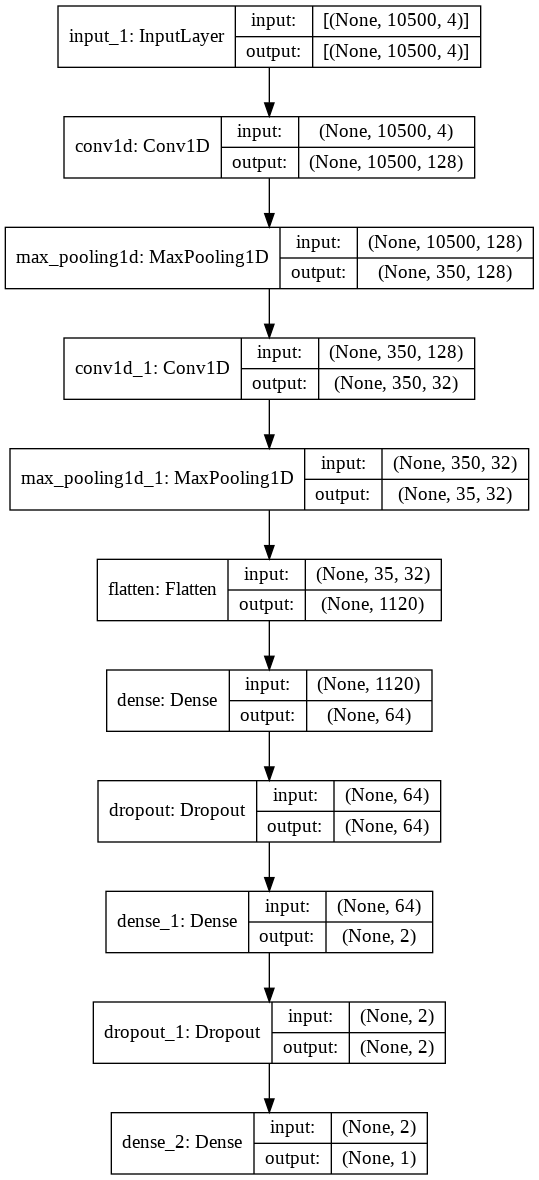


Parameters:
{'checkpoint_dir': 'nohalf/', 'model_type': 'Xpresso_nohalf', 'n_epochs': 300, 'batch_size': 128, 'learning_rate': 0.0005, 'momentum': 0.9, 'CNN_input': (10500, 4), 'miRNA_input': (2064,), 'dropout_rate': 0.5, 'lr_reduction_epoch': None, 'shuffle': True, 'logdir': 'logs/Xpresso_nohalf_0-006', 'patience': 7, 'n_components_LSA': 100, 'history': '', 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7eff8473f790>}



In [ ]:
# # Clear any logs from previous runs
#!rm -rf ./logs/Xpresso_micro-006/
# maxlen=18850
model_type="Xpresso_nohalf"
checkpoint_dir="nohalf/"
logdir = None#f"{model_type}_0-006"


######################################################################################################################
import tensorflow as tf
tf.keras.backend.clear_session()

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.experimental.TPUStrategy(resolver)


with strategy.scope():
    net = projCNN1D(shuffle=True, checkpoint_dir=checkpoint_dir, 
                    model_type=model_type, n_epochs=300, batch_size=128, learning_rate=5e-4, 
                    CNN_input=(maxlen, 4), dropout_rate=0.5, logdir=logdir, patience=7)
    
########################################################################################################################

Epoch 1/300

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
121/121 [==============================] - 10s 56ms/step - loss: 0.9899 - val_loss: 0.9684
Epoch 2/300

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
121/121 [==============================] - 3s 23ms/step - loss: 0.9824 - val_loss: 0.9622
Epoch 3/300

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
121/121 [==============================] - 2s 18ms/step - loss: 0.9712 - val_loss: 0.9480
Epoch 4/300

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
121/121 [==============================] - 2s 19ms/step - loss: 0.9556 - val_loss: 0.9330
Epoch 5/300

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
121/121 [==============================] - 2s 19ms/step - loss: 0.9302 - val_loss: 0.8966
Epoch 6/300

Epoch 00006: LearningRateScheduler reducing learnin

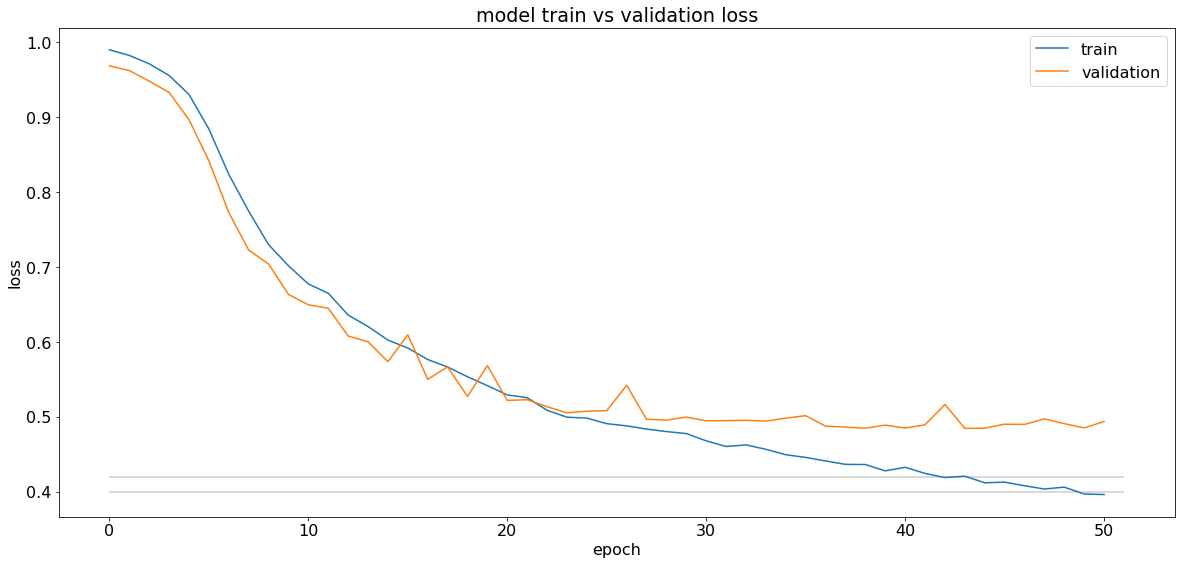

In [ ]:
net.train_model([X_trainpromoter_p], y_train, [X_validationpromoter_p], y_validation, True)

Evaluate Xpresso_Micro

In [ ]:
net.evaluate([X_testpromoter_p], y_test)

Test R^2 = 0.540


0.5397395354313924

In [ ]:
# net.evaluate_best([X_testpromoter_p, X_testhalflife, X_testmicro], y_test)

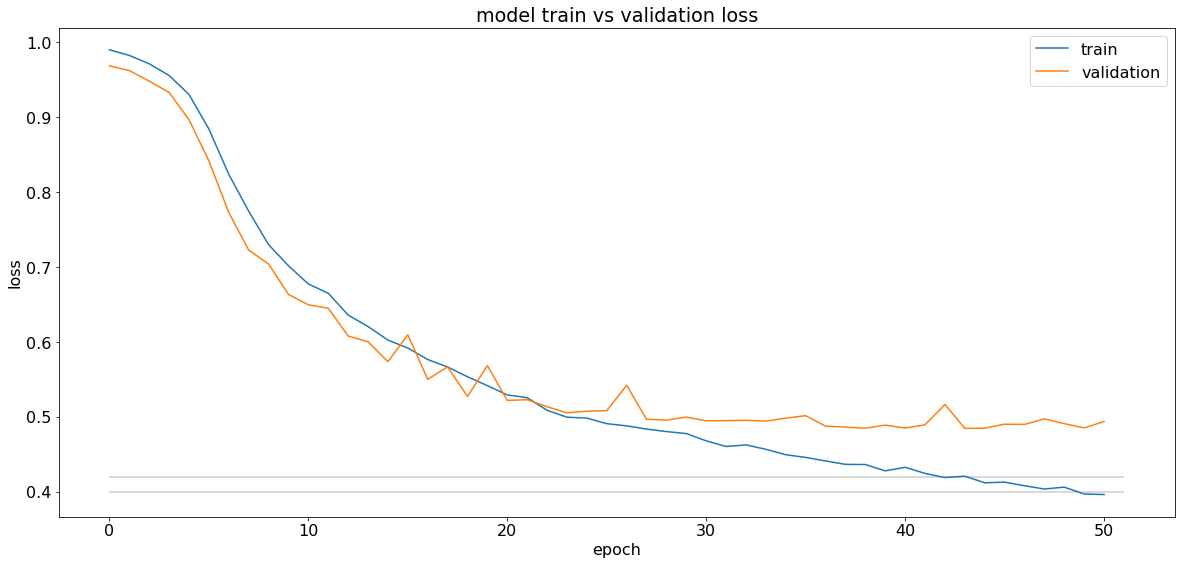

In [ ]:
net.plot_train()

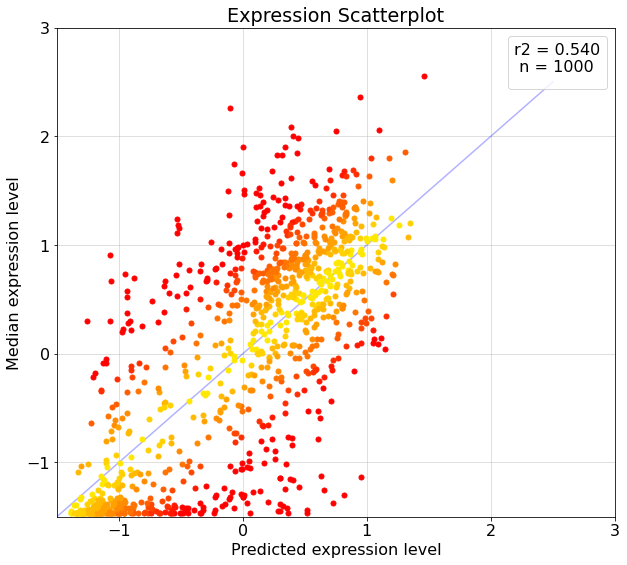

In [ ]:
net.plot_r2([X_testpromoter_p], y_test, True)

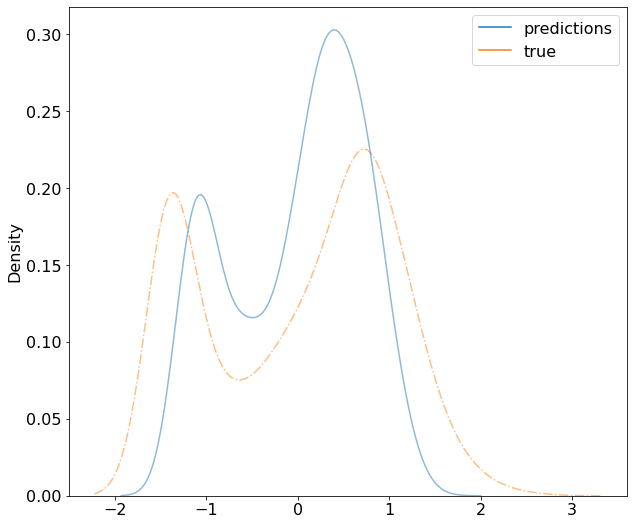

In [ ]:
net.plot_kde([X_testpromoter_p], y_test, True)

100%|██████████| 181/181 [00:00<00:00, 6913.23it/s]

(1000, 8)
(1000, 181)
[-0.10420840144720721, -0.05721558876391226, -0.005544481289658232, 0.014083383558743494, 0.019095571441793382, 0.036063290905657595, 0.03646459498172865, 0.04171257821188414, 0.0636999233949349, 0.06386063491845174, 0.07053914876142377, 0.07857637518064683, 0.08241352701703349, 0.0843960526414187, 0.08579503082643587, 0.09457280583498322, 0.0982585022608956, 0.09863100627012593, 0.10548968053252793, 0.10589512808860486, 0.10994308312951585, 0.11224778571681701, 0.11911872374181016, 0.1220528598739159, 0.13369119705974283, 0.13431034646304654, 0.1547927788530737, 0.16556129884483328, 0.16725964251230505, 0.17245308943392648, 0.17622049595922296, 0.1838242860605894, 0.18806472902225, 0.1943264255747839, 0.19553698549933507, 0.20184378669767794, 0.20194718611190646, 0.2029866469812588, 0.20583218044684828, 0.21383931758899105, 0.21463031724249476, 0.2180412108846616, 0.21962424226621854, 0.22078912994697197, 0.22529736668389028, 0.2321824276246781, 0.232703258413628

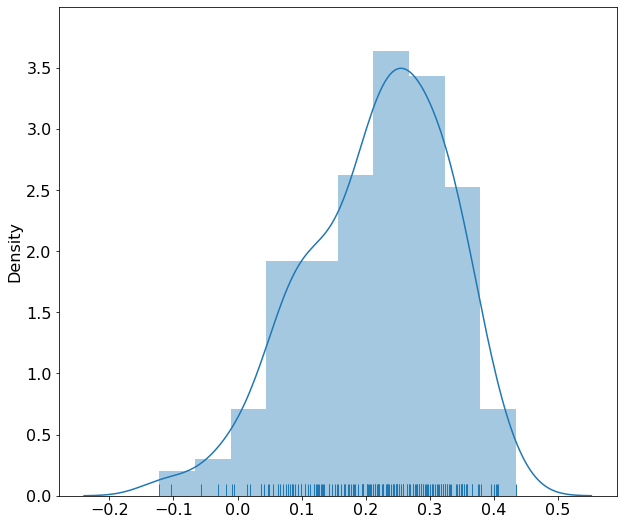

In [ ]:
pred = net.model.predict([X_testpromoter_p]).flatten()
residuals = y_test - pred

from tqdm import tqdm
from scipy import stats
import seaborn as sns

print(X_testhalflife.shape)
print(X_testtf.shape)

corr = []
for i in tqdm(range(181)):
  corr.append(stats.pointbiserialr(X_testtf[:,i].astype("float32"), residuals.astype("float32"))[0])
corr.sort()
sum(corr)/181
corr[-4:]

sns.distplot(x=corr, rug=True)
print(corr)

100%|██████████| 8/8 [00:00<00:00, 2807.43it/s]

(1000, 8)
(1000,)
[-0.05973121702743358, -0.054454219502715735, -0.0033249799195478958, 0.032436808486202715, 0.0328569358310562, 0.036010483020155123, 0.057226390172254796, 0.16923062899084582]


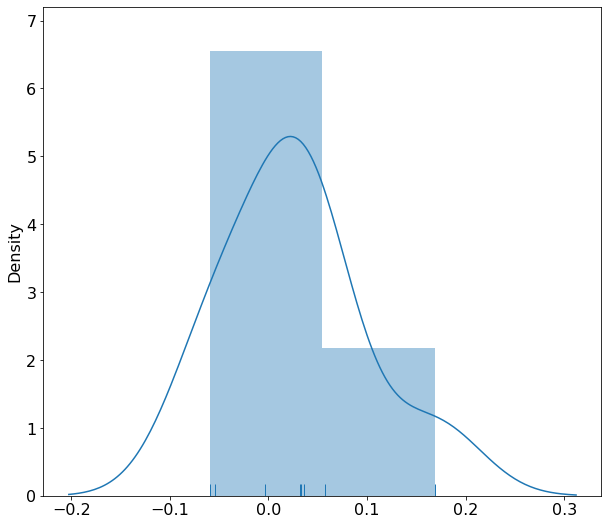

In [ ]:
pred = net.model.predict([X_testpromoter_p]).flatten()
residuals = y_test - pred

from tqdm import tqdm
from scipy import stats
import seaborn as sns

print(X_testhalflife.shape)
print(residuals.shape)
corr = []
for i in tqdm(range(8)):
  corr.append(stats.pointbiserialr(X_testhalflife[:,i].astype("float32"), residuals.astype("float32"))[0])
corr.sort()
sum(corr)/8
corr[-4:]

sns.distplot(x=corr, rug=True)
print(corr)